# Introduction to IMC data (optional)

[**Imaging Mass Cytometry**](./IMC.md) using data (case 6126 E08) from Damond et al. A Map of Human Type 1 Diabetes Progression by Imaging Mass Cytometry. Cell Metabolism 2019;29(3):755-768.e5. [[link](https://www.sciencedirect.com/science/article/pii/S1550413118306910)]

**`03-imc-intro.ipynb`** - BMED365 / Lab1-mpMRI-glioma / Lab-optional-imaging (optional notebook related to imaging and stats) <br>

Version 2024-01-17 (using the bmed365 kernel) A. Lundervold


<a href="https://colab.research.google.com/github/MMIV-ML/BMED365/blob/main/Lab1-mpMRI-glioma/Lab-optional-imaging/03-imc-intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Progression by Imaging Mass Cytometry  
 
### > An example on OPEN SCIENCE and REPRODUCIBLE RESEARCH policy (here:  [Mendeley data](https://data.mendeley.com) sharing)


Published: 09-04-2020  **Version 2**  **DOI**:10.17632/cydmwsfztj.2  [[link](https://data.mendeley.com/datasets/cydmwsfztj/2)]<br>
Contributor: Nicolas Damond

### Description
Data related to the publication: "A Map of Human Type 1 Diabetes Progression by Imaging Mass Cytometry".

Damond N, Engler S, Zanotelli VRT, Schapiro D, Wasserfall CH, Kusmartseva I, Nick HS, Thorel F, Herrera PL, Atkinson MA and Bodenmiller B. Cell Metab. 2019 Mar 5;29(3):755-768.e5. https://doi.org/10.1016/j.cmet.2018.11.014

We used imaging mass cytometry to simultaneously image 37 biomarkers with single-cell and spatial resolution in pancreas sections from 12 human donors at different stages of type 1 diabetes.
```shell
CODE:
- Python script for coordinate transformation
- Functions for custom histoCAT neighborhood analysis

DATA:
- Single-cell data
- Islet-level data
- Cell type information
- Cell relationships (cell-cell neighborhoods and cell-islet relationships)
- Donors and image metadata.
- Subset containing the data for 100 images from 3 donors

IMAGES:
- Image stacks (37 channels) for all donors (one .7z file per donor, numbers indicate nPOD case IDs)
- Cell masks
- Panel file with information related to antibodies and metal tags
- Metadata file linking donor information to images
- Metadata file linking image stack slices and panel information
- Subset containing 100 images from 3 donors
```


**How to select and organize data locally:**

- Downloads --> cydmwsfztj-1 --> Data --> Images -->  Panel.csv (1 KB) / Metadata.csv (25 KB) / 6126.7z (360 MB)

- 6126.7z (360 MB) --> E08_a0_full.csv (222 B) / E08_a0_full.tiff (42 MB)

| **image**	 | **case**	| **slide**	 | **part**	| **group** |	**stage**  |
| :--------: | :------: | :--------: | :------: | :-------: | :---------:  |
|   E08	     | 6126	    | E	         | Tail	    |       1   | Non-diabetic |

**E08_a0_full.csv**: 
In113
In115
Pr141
Nd142
Nd143
Nd144
Nd145
Nd146
Sm147
Nd148
Sm149
Nd150
Sm152
Eu153
Sm154
Gd156
Gd158
Tb159
Gd160
Dy161
Dy162
Dy163
Dy164
Ho165
Er166
Er167
Er168
Tm169
Er170
Yb171
Yb172
Yb173
Yb174
Lu175
Yb176
Ir191
Ir193

In [2]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
    # Some libraries will be necessary to "pip install" on colab:
    # nil
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


**Download zipped data from Google Drive using gdown**

In [3]:
import gdown
import shutil
import os
import sys

In [4]:
if os.path.isdir('./assets') == False:
    
    ## Download assets.zip from Google Drive (My Drive -> ELMED219 -> Lab-optional-imaging -> assets.zip)
    # https://drive.google.com/file/d/1yYoQZR8jSyL1_23wimkMDHQv3cGC8TWN/view?usp=share_link
    
    file_id = '1yYoQZR8jSyL1_23wimkMDHQv3cGC8TWN'
    url = 'https://drive.google.com/uc?id=%s' % file_id
    output = './assets.zip'
    #gdown.download(url, output, quiet=False)
    !gdown "1yYoQZR8jSyL1_23wimkMDHQv3cGC8TWN&confirm=t"
    
    ## Unzip the assets.zip file into `./assets`
    shutil.unpack_archive(output, '.')
    
    ## Delete the `assets.zip` file
    os.remove(output)
else:
    print(f'./assets  exists already and will not be overwritten!')

./assets  exists already and will not be overwritten!


In [5]:
if os.path.isdir('./data') == False:
    
    ## Download data.zip from Google Drive  (My Drive -> ELMED219 -> Lab-optional-imaging -> data.zip)
    # https://drive.google.com/file/d/1mKbERWG09Ni5UpnYhLlcebKfxeVu_Y2c/view?usp=share_link
    
    file_id = '1mKbERWG09Ni5UpnYhLlcebKfxeVu_Y2c'
    url = 'https://drive.google.com/uc?id=%s' % file_id
    output = './data.zip'
    #gdown.download(url, output, quiet=False)
    !gdown "1mKbERWG09Ni5UpnYhLlcebKfxeVu_Y2c&confirm=t"
    
    ## Unzip the data.zip file into `./data`
    shutil.unpack_archive(output, '.')
    
    ## Delete the `data.zip` file
    os.remove(output)
else:
    print(f'./data  exists already and will not be overwritten!')

./data  exists already and will not be overwritten!


### Import the libraries being used

In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from skimage import io
from skimage import color
from skimage import morphology
from skimage.morphology import disk
from skimage.filters import median
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import ndimage
from skimage.filters import threshold_otsu
from skimage import img_as_ubyte
from skimage import img_as_float
from scipy.ndimage import gaussian_filter
from skimage.morphology import reconstruction
import nibabel as nib
import os

import tifffile as tiff

In [7]:
HOME = os.path.expanduser('~')  # To make path to local home directory

### Define the data being used

In [8]:
fn_tiff = './data/imc/E08_a0_full.tiff'
fn_csv = './data/imc/E08_a0_full.csv'
fn_panel = './data/imc/table1_IMC_panel_37x4.csv'

In [9]:
# For direct inclusion of figures and tables in the Overleaf on Linux / MacOS and NOT Windows ('nt')
# i.e. LaTeX document (Overleaf is synced with Dropbox on MacOS/Linux)

 #home = '/mnt/sata12tb'  # AD HOC 

#if os.name == 'nt':
#    fn_fig_base = '%s/tmp' % home
#    fn_tab_base = '%s/tmp' % home
#else:    
#    fn_fig_base = '%s/Dropbox/Apps/Overleaf/BMED360-2021-bioimaging/Figs' % (HOME)
#    fn_tab_base = '%s/Dropbox/Apps/Overleaf/BMED360-2021-bioimaging' % (HOME)

### Read the IMC imagefile and print characteristics

In [10]:
im = io.imread(fn_tiff)
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(37, 530, 567)


### Get number of channels in the recording

In [11]:
n_chn = im.shape[0]
n_chn

37

### Read the channel names into a Pandas dataframe

In [12]:
df = pd.read_csv(fn_csv, usecols=[0], names=['chn'], header=None)
df.shape

(37, 1)

### Inspect the first 19 and the last 19 channel names

In [13]:
df.head(19).T

0      1      2      3      4      5      6      7      8      9   \
chn  In113  In115  Pr141  Nd142  Nd143  Nd144  Nd145  Nd146  Sm147  Nd148   

        10     11     12     13     14     15     16     17     18  
chn  Sm149  Nd150  Sm152  Eu153  Sm154  Gd156  Gd158  Tb159  Gd160

In [14]:
df.tail(19).T

18     19     20     21     22     23     24     25     26     27  \
chn  Gd160  Dy161  Dy162  Dy163  Dy164  Ho165  Er166  Er167  Er168  Tm169   

        28     29     30     31     32     33     34     35     36  
chn  Er170  Yb171  Yb172  Yb173  Yb174  Lu175  Yb176  Ir191  Ir193

### Extract the first channel name as a string

In [15]:
print(type(df.chn.iloc[0]))
df.chn.iloc[0]

<class 'str'>


'In113'

### Read the IMC dataset panel information into a dataframe and display the table

**NOTE**: The order of panel antigens is not the same as the order of channels in the IMC recordings

### !! Inconsistency in Panel vs. IMC channel list  (175Yb vs. Lu175) !!

In [15]:
df.chn.iloc[33]

'Lu175'

In [16]:
df.chn.iloc[33] = 'Yb175'
df.chn.iloc[33]

'Yb175'

In [17]:
df.T

0      1      2      3      4      5      6      7      8      9   \
chn  In113  In115  Pr141  Nd142  Nd143  Nd144  Nd145  Nd146  Sm147  Nd148   

     ...     27     28     29     30     31     32     33     34     35     36  
chn  ...  Tm169  Er170  Yb171  Yb172  Yb173  Yb174  Yb175  Yb176  Ir191  Ir193  

[1 rows x 37 columns]

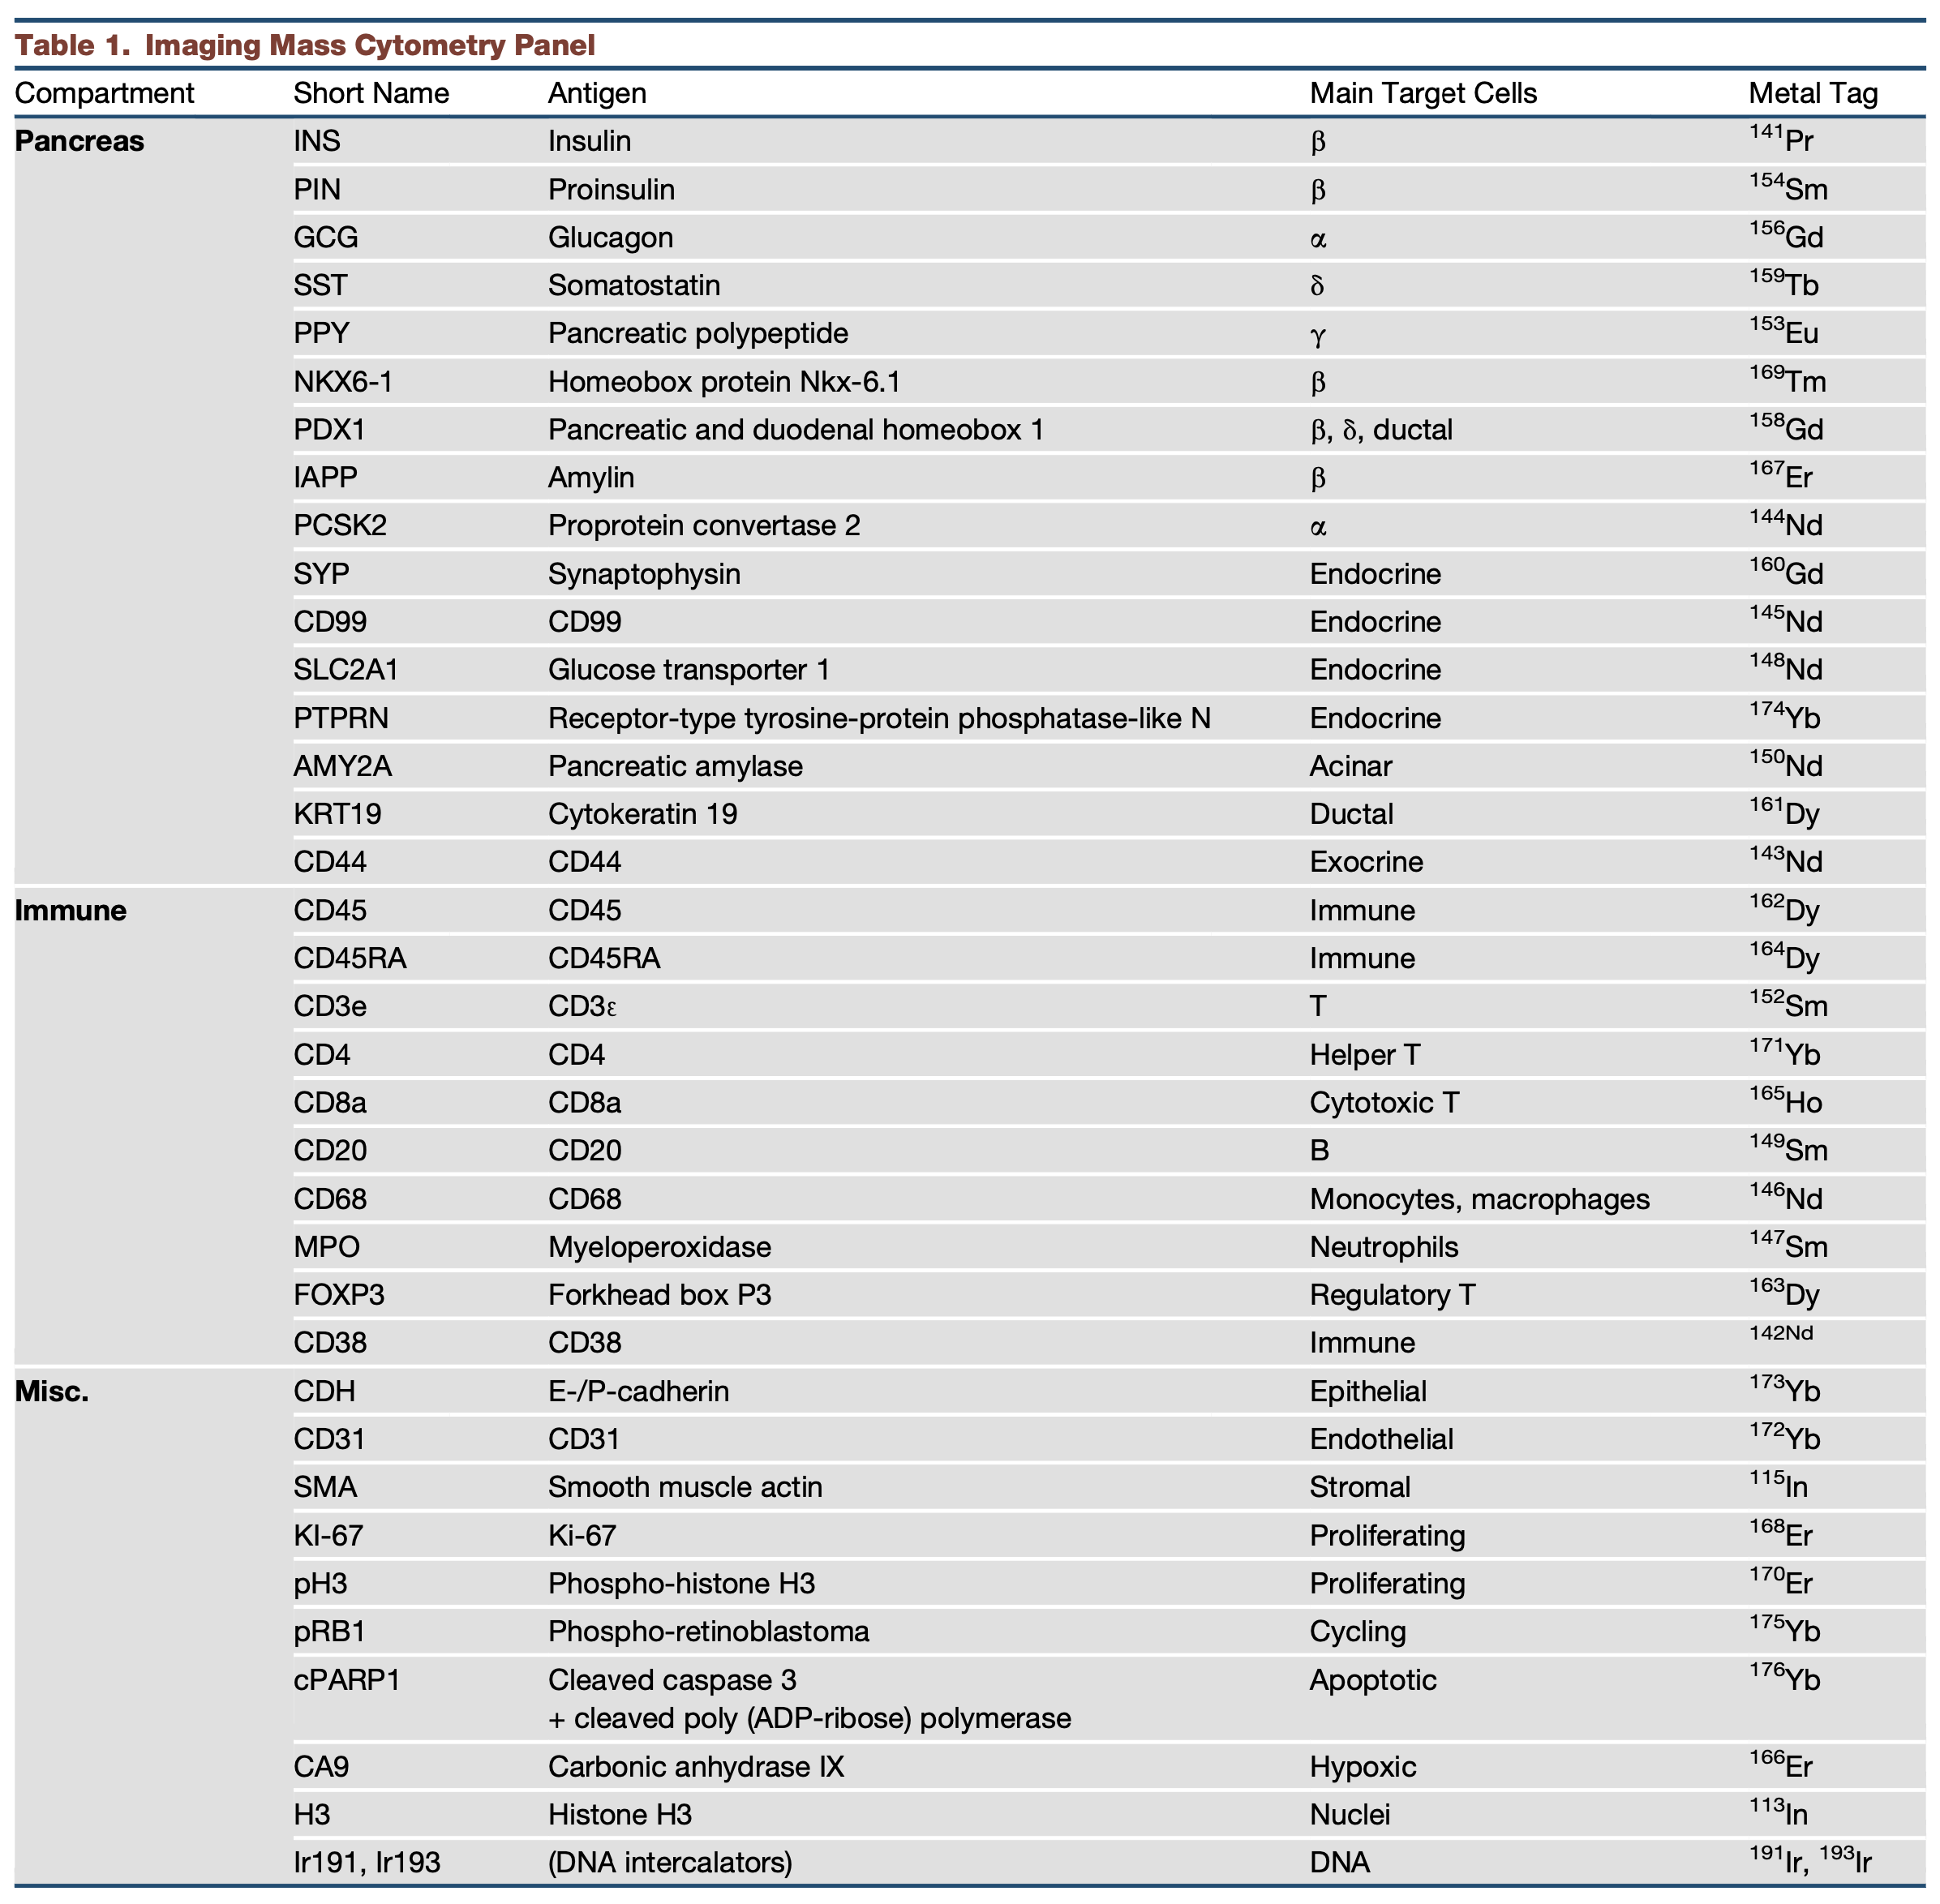

In [18]:
from IPython.display import Image
Image(filename = "./assets/BMED_360_Damond_etal_2019_Tab1_IMC_panel.png", width=700)

In [19]:
df_p = pd.read_csv(fn_panel)
print(df_p.shape)
df_p

(37, 4)


Short Name                                            Antigen  \
0         INS                                            Insulin   
1         PIN                                         Proinsulin   
2         GCG                                           Glucagon   
3         SST                                       Somatostatin   
4         PPY                             Pancreatic polypeptide   
5      NKX6-1                           Homeobox protein Nkx-6.1   
6        PDX1                 Pancreatic and duodenal homeobox 1   
7        IAPP                                             Amylin   
8       PCSK2                            Proprotein convertase 2   
9         SYP                                      Synaptophysin   
10       CD99                                               CD99   
11     SLC2A1                              Glucose transporter 1   
12      PTPRN  Receptor-type tyrosine-protein phosphatase-like N   
13      AMY2A                                 Pancreatic amylase   
14      KRT19                                     Cytokeratin 19   
15       CD44                                               CD44   
16       CD45                                               CD45   
17     CD45RA                                             CD45RA   
18       CD3e                                               CD3ɛ   
19        CD4                                                CD4   
20       CD8a                                               CD8a   
21       CD20                                               CD20   
22       CD68                                               CD68   
23        MPO                                    Myeloperoxidase   
24      FOXP3                                    Forkhead box P3   
25       CD38                                               CD38   
26        CDH                                      E-/P-cadherin   
27       CD31                                               CD31   
28        SMA                                Smooth muscle actin   
29      KI-67                                              Ki-67   
30        pH3                                 Phospho-histone H3   
31       pRB1                             Phospho-retinoblastoma   
32     cPARP1  Cleaved caspase 3 + cleaved poly (ADP-ribose) ...   
33        CA9                              Carbonic anhydrase IX   
34         H3                                         Histone H3   
35      Ir191                                (DNA intercalators)   
36      Ir193                                (DNA intercalators)   

        Main Target Cells Metal Tag  
0                       β     141Pr  
1                       β     154Sm  
2                       α     156Gd  
3                       δ     159Tb  
4                       γ     153Eu  
5                       β     169Tm  
6              β δ ductal     158Gd  
7                       β     167Er  
8                       α     144Nd  
9               Endocrine     160Gd  
10              Endocrine     145Nd  
11              Endocrine     148Nd  
12              Endocrine     174Yb  
13                 Acinar     150Nd  
14                 Ductal     161Dy  
15               Exocrine     143Nd  
16                 Immune     162Dy  
17                 Immune     164Dy  
18                      T     152Sm  
19               Helper T     171Yb  
20            Cytotoxic T     165Ho  
21                      B     149Sm  
22  Monocytes macrophages     146Nd  
23            Neutrophils     147Sm  
24           Regulatory T     163Dy  
25                 Immune     142Nd  
26             Epithelial     173Yb  
27            Endothelial     172Yb  
28                Stromal     115In  
29          Proliferating     168Er  
30          Proliferating     170Er  
31                Cycling     175Yb  
32              Apoptotic     176Yb  
33                Hypoxic     166Er  
34                 Nuclei     113In  
35                    DNA     191Ir  
36          

### Insert IMC channel number in Panel data frame

In [20]:
df_p['Chn'] = np.array(range(len(df.chn)))
for idx, val in enumerate(list(df.chn)):
    s = (val[2:]+val[:2])
    for idx2, val2 in enumerate(list(df_p['Metal Tag'])):
        if  s==val2:
            df_p.Chn.iloc[idx2] = idx+1
df_p

/tmp/ipykernel_21455/2146505735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p.Chn.iloc[idx2] = idx+1


Short Name                                            Antigen  \
0         INS                                            Insulin   
1         PIN                                         Proinsulin   
2         GCG                                           Glucagon   
3         SST                                       Somatostatin   
4         PPY                             Pancreatic polypeptide   
5      NKX6-1                           Homeobox protein Nkx-6.1   
6        PDX1                 Pancreatic and duodenal homeobox 1   
7        IAPP                                             Amylin   
8       PCSK2                            Proprotein convertase 2   
9         SYP                                      Synaptophysin   
10       CD99                                               CD99   
11     SLC2A1                              Glucose transporter 1   
12      PTPRN  Receptor-type tyrosine-protein phosphatase-like N   
13      AMY2A                                 Pancreatic amylase   
14      KRT19                                     Cytokeratin 19   
15       CD44                                               CD44   
16       CD45                                               CD45   
17     CD45RA                                             CD45RA   
18       CD3e                                               CD3ɛ   
19        CD4                                                CD4   
20       CD8a                                               CD8a   
21       CD20                                               CD20   
22       CD68                                               CD68   
23        MPO                                    Myeloperoxidase   
24      FOXP3                                    Forkhead box P3   
25       CD38                                               CD38   
26        CDH                                      E-/P-cadherin   
27       CD31                                               CD31   
28        SMA                                Smooth muscle actin   
29      KI-67                                              Ki-67   
30        pH3                                 Phospho-histone H3   
31       pRB1                             Phospho-retinoblastoma   
32     cPARP1  Cleaved caspase 3 + cleaved poly (ADP-ribose) ...   
33        CA9                              Carbonic anhydrase IX   
34         H3                                         Histone H3   
35      Ir191                                (DNA intercalators)   
36      Ir193                                (DNA intercalators)   

        Main Target Cells Metal Tag  Chn  
0                       β     141Pr    3  
1                       β     154Sm   15  
2                       α     156Gd   16  
3                       δ     159Tb   18  
4                       γ     153Eu   14  
5                       β     169Tm   28  
6              β δ ductal     158Gd   17  
7                       β     167Er   26  
8                       α     144Nd    6  
9               Endocrine     160Gd   19  
10              Endocrine     145Nd    7  
11              Endocrine     148Nd   10  
12              Endocrine     174Yb   33  
13                 Acinar     150Nd   12  
14                 Ductal     161Dy   20  
15               Exocrine     143Nd    5  
16                 Immune     162Dy   21  
17                 Immune     164Dy   23  
18                      T     152Sm   13  
19               Helper T     171Yb   30  
20            Cytotoxic T     165Ho   24  
21                      B     149Sm   11  
22  Monocytes macrophages     146Nd    8  
23            Neutrophils     147Sm    9  
24           Regulatory T     163Dy   22  
25                 Immune     142Nd    4  
26             Epithelial     173Yb   32  
27            Endothelial     172Yb   31  
28                Stromal     115In    2  
29          Proliferating     168Er   27  
30          Proliferating     170Er   29  
31                Cycling     175Yb   34  

In [21]:
fn = './data/imc/E08_a0_panel_data_and_channel_numbering.csv'
df_p.to_csv(fn, encoding='utf-8', index=False)

In [22]:
df_p_sort_chn = df_p.sort_values('Chn')
df_p_sort_chn

Short Name                                            Antigen  \
34         H3                                         Histone H3   
28        SMA                                Smooth muscle actin   
0         INS                                            Insulin   
25       CD38                                               CD38   
15       CD44                                               CD44   
8       PCSK2                            Proprotein convertase 2   
10       CD99                                               CD99   
22       CD68                                               CD68   
23        MPO                                    Myeloperoxidase   
11     SLC2A1                              Glucose transporter 1   
21       CD20                                               CD20   
13      AMY2A                                 Pancreatic amylase   
18       CD3e                                               CD3ɛ   
4         PPY                             Pancreatic polypeptide   
1         PIN                                         Proinsulin   
2         GCG                                           Glucagon   
6        PDX1                 Pancreatic and duodenal homeobox 1   
3         SST                                       Somatostatin   
9         SYP                                      Synaptophysin   
14      KRT19                                     Cytokeratin 19   
16       CD45                                               CD45   
24      FOXP3                                    Forkhead box P3   
17     CD45RA                                             CD45RA   
20       CD8a                                               CD8a   
33        CA9                              Carbonic anhydrase IX   
7        IAPP                                             Amylin   
29      KI-67                                              Ki-67   
5      NKX6-1                           Homeobox protein Nkx-6.1   
30        pH3                                 Phospho-histone H3   
19        CD4                                                CD4   
27       CD31                                               CD31   
26        CDH                                      E-/P-cadherin   
12      PTPRN  Receptor-type tyrosine-protein phosphatase-like N   
31       pRB1                             Phospho-retinoblastoma   
32     cPARP1  Cleaved caspase 3 + cleaved poly (ADP-ribose) ...   
35      Ir191                                (DNA intercalators)   
36      Ir193                                (DNA intercalators)   

        Main Target Cells Metal Tag  Chn  
34                 Nuclei     113In    1  
28                Stromal     115In    2  
0                       β     141Pr    3  
25                 Immune     142Nd    4  
15               Exocrine     143Nd    5  
8                       α     144Nd    6  
10              Endocrine     145Nd    7  
22  Monocytes macrophages     146Nd    8  
23            Neutrophils     147Sm    9  
11              Endocrine     148Nd   10  
21                      B     149Sm   11  
13                 Acinar     150Nd   12  
18                      T     152Sm   13  
4                       γ     153Eu   14  
1                       β     154Sm   15  
2                       α     156Gd   16  
6              β δ ductal     158Gd   17  
3                       δ     159Tb   18  
9               Endocrine     160Gd   19  
14                 Ductal     161Dy   20  
16                 Immune     162Dy   21  
24           Regulatory T     163Dy   22  
17                 Immune     164Dy   23  
20            Cytotoxic T     165Ho   24  
33                Hypoxic     166Er   25  
7                       β     167Er   26  
29          Proliferating     168Er   27  
5                       β     169Tm   28  
30          Proliferating     170Er   29  
19               Helper T     171Yb   30  
27            Endothelial     172Yb   31  
26             Epithelial     173Yb   32  

In [23]:
fn = './data/imc/E08_a0_panel_data_sorted_on_channel_numbering.csv'
df_p_sort_chn.to_csv(fn, encoding='utf-8', index=False)

### Pandas dataframe to LaTeX table
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_latex.html

In [24]:
#print(df_p.to_latex(index=True)) 
print(df_p.style.to_latex())

\begin{tabular}{lllllr}
 & Short Name & Antigen & Main Target Cells & Metal Tag & Chn \\
0 & INS & Insulin & β & 141Pr & 3 \\
1 & PIN & Proinsulin & β & 154Sm & 15 \\
2 & GCG & Glucagon & α & 156Gd & 16 \\
3 & SST & Somatostatin & δ & 159Tb & 18 \\
4 & PPY & Pancreatic polypeptide & γ & 153Eu & 14 \\
5 & NKX6-1 & Homeobox protein Nkx-6.1 & β & 169Tm & 28 \\
6 & PDX1 & Pancreatic and duodenal homeobox 1 & β δ ductal & 158Gd & 17 \\
7 & IAPP & Amylin & β & 167Er & 26 \\
8 & PCSK2 & Proprotein convertase 2 & α & 144Nd & 6 \\
9 & SYP & Synaptophysin & Endocrine & 160Gd & 19 \\
10 & CD99 & CD99 & Endocrine & 145Nd & 7 \\
11 & SLC2A1 & Glucose transporter 1 & Endocrine & 148Nd & 10 \\
12 & PTPRN & Receptor-type tyrosine-protein phosphatase-like N & Endocrine & 174Yb & 33 \\
13 & AMY2A & Pancreatic amylase & Acinar & 150Nd & 12 \\
14 & KRT19 & Cytokeratin 19 & Ductal & 161Dy & 20 \\
15 & CD44 & CD44 & Exocrine & 143Nd & 5 \\
16 & CD45 & CD45 & Immune & 162Dy & 21 \\
17 & CD45RA & CD45RA & Imm

In [25]:
print(df_p_sort_chn.to_latex(index=True)) 

\begin{tabular}{lllllr}
\toprule
{} & Short Name &                                            Antigen &      Main Target Cells & Metal Tag &  Chn \\
\midrule
34 &         H3 &                                         Histone H3 &                 Nuclei &     113In &    1 \\
28 &        SMA &                                Smooth muscle actin &                Stromal &     115In &    2 \\
0  &        INS &                                            Insulin &                      β &     141Pr &    3 \\
25 &       CD38 &                                               CD38 &                 Immune &     142Nd &    4 \\
15 &       CD44 &                                               CD44 &               Exocrine &     143Nd &    5 \\
8  &      PCSK2 &                            Proprotein convertase 2 &                      α &     144Nd &    6 \\
10 &       CD99 &                                               CD99 &              Endocrine &     145Nd &    7 \\
22 &       CD68 &             

/tmp/ipykernel_21455/808085034.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_p_sort_chn.to_latex(index=True))


### Write latex table directly to file, then use `\input(table.tex)` in Overleaf 
**remember `\usepackage{booktabs}`**

In [26]:
# Replace greek letter with mathematical greek in the Main Target Cells column
df_p_edit = df_p.copy()

old_list = ['α', 'β', 'δ', 'γ', 'β δ ductal']
new_list = ['$\\alpha$', '$\\beta$', '$\\delta$', '$\\gamma$', '$\\beta$ $\\delta$ ductal']
df_p_edit['Main Target Cells'] = df_p_edit['Main Target Cells'].replace(old_list, new_list)

# And add 1 to the index (i.e. panel antigen numbering)
df_p_edit.index = np.arange(1, len(df_p_edit)+1)
#df_p_edit.index.names = ['Channel']
df_p_edit['PanelNo'] = df_p_edit.index 

# Reorder columns to start with Channel
cols = list(df_p_edit.columns.values)
print(cols)
cols = [df_p_edit.columns[-1]] + [col for col in df_p_edit if col != df_p_edit.columns[-1]]
print(cols)
df_p_edit = df_p_edit[cols]

['Short Name', 'Antigen', 'Main Target Cells', 'Metal Tag', 'Chn', 'PanelNo']
['PanelNo', 'Short Name', 'Antigen', 'Main Target Cells', 'Metal Tag', 'Chn']


**Inspect**

In [27]:
df_p_edit

PanelNo Short Name                                            Antigen  \
1         1        INS                                            Insulin   
2         2        PIN                                         Proinsulin   
3         3        GCG                                           Glucagon   
4         4        SST                                       Somatostatin   
5         5        PPY                             Pancreatic polypeptide   
6         6     NKX6-1                           Homeobox protein Nkx-6.1   
7         7       PDX1                 Pancreatic and duodenal homeobox 1   
8         8       IAPP                                             Amylin   
9         9      PCSK2                            Proprotein convertase 2   
10       10        SYP                                      Synaptophysin   
11       11       CD99                                               CD99   
12       12     SLC2A1                              Glucose transporter 1   
13       13      PTPRN  Receptor-type tyrosine-protein phosphatase-like N   
14       14      AMY2A                                 Pancreatic amylase   
15       15      KRT19                                     Cytokeratin 19   
16       16       CD44                                               CD44   
17       17       CD45                                               CD45   
18       18     CD45RA                                             CD45RA   
19       19       CD3e                                               CD3ɛ   
20       20        CD4                                                CD4   
21       21       CD8a                                               CD8a   
22       22       CD20                                               CD20   
23       23       CD68                                               CD68   
24       24        MPO                                    Myeloperoxidase   
25       25      FOXP3                                    Forkhead box P3   
26       26       CD38                                               CD38   
27       27        CDH                                      E-/P-cadherin   
28       28       CD31                                               CD31   
29       29        SMA                                Smooth muscle actin   
30       30      KI-67                                              Ki-67   
31       31        pH3                                 Phospho-histone H3   
32       32       pRB1                             Phospho-retinoblastoma   
33       33     cPARP1  Cleaved caspase 3 + cleaved poly (ADP-ribose) ...   
34       34        CA9                              Carbonic anhydrase IX   
35       35         H3                                         Histone H3   
36       36      Ir191                                (DNA intercalators)   
37       37      Ir193                                (DNA intercalators)   

          Main Target Cells Metal Tag  Chn  
1                   $\beta$     141Pr    3  
2                   $\beta$     154Sm   15  
3                  $\alpha$     156Gd   16  
4                  $\delta$     159Tb   18  
5                  $\gamma$     153Eu   14  
6                   $\beta$     169Tm   28  
7   $\beta$ $\delta$ ductal     158Gd   17  
8                   $\beta$     167Er   26  
9                  $\alpha$     144Nd    6  
10                Endocrine     160Gd   19  
11                Endocrine     145Nd    7  
12                Endocrine     148Nd   10  
13                Endocrine     174Yb   33  
14                   Acinar     150Nd   12  
15                   Ductal     161Dy   20  
16                 Exocrine     143Nd    5  
17                   Immune     162Dy   21  
18                   Immune     164Dy   23  
19                        T     152Sm   13  
20                 Helper T     171Yb   30  
21              Cytotoxic T     165Ho   24  
22                        B     149Sm   11  
23    Monocytes macrophages     146Nd    8

**EXTRA: save to file to sync with Overleaf**

In [28]:
#tab_fn = '%s/ELMED219-2024_experiments_case6126_E08_panel_table.tex' % fn_tab_base
#with open(tab_fn, 'w') as tf:
#    tf.write(df_p_edit.to_latex(index=False, escape=False))

## Plot the IMC dataset as a 7 x 6 grid of color-coded channels
#### (Optionally: save Fig for the Overleaf document)

With histogram equalization for better visualization
https://stackoverflow.com/questions/28518684/histogram-equalization-of-grayscale-images-with-numpy

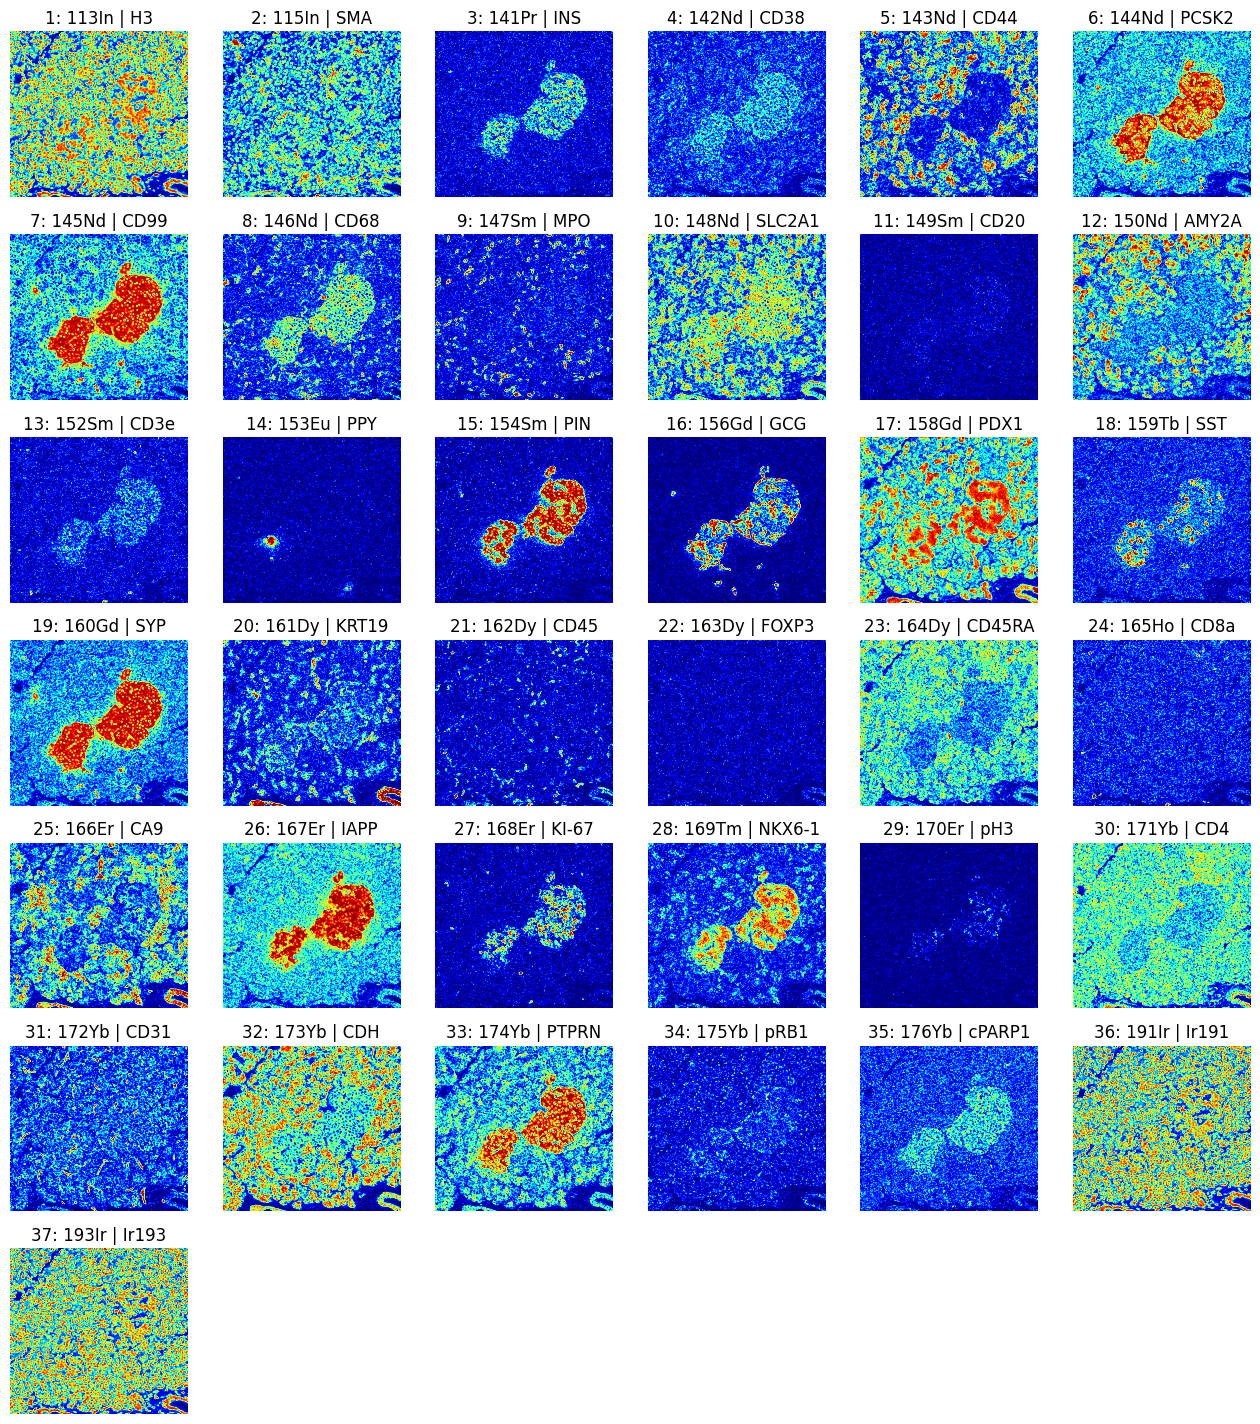

In [29]:
#fig_fn = '%s/ELMED219-2024_experiments_case6126_E08_channel_eq_mosaic_jet.pdf' % fn_fig_base
fig, axes = plt.subplots(7, 6, figsize=(16, 18), sharex=False, sharey=False)
ax = axes.ravel()
for i, item in enumerate(range(n_chn)):
    chn = np.squeeze(im[i,:,:])
    chn_eq = np.sort(chn.ravel()).searchsorted(chn)  # a kind of histogram equalization
    ax[i].imshow(chn_eq, cmap='jet' )   # cmap='jet', 'gray'
    ax[i].set_title('%d: %s | %s' % ((i+1), df_p_sort_chn['Metal Tag'].iloc[i], df_p_sort_chn['Short Name'].iloc[i]))
    ax[i].axis('off')
chn_0 = np.zeros(chn.shape )   
for j in range(n_chn,7*6):
    ax[j].imshow(chn_0, cmap='gray_r') 
    ax[j].axis('off')
#plt.savefig(fig_fn, bbox_inches='tight')
plt.show()

### Plot the IMC dataset as a 7 x 6 grid of gray-level-coded channels¶

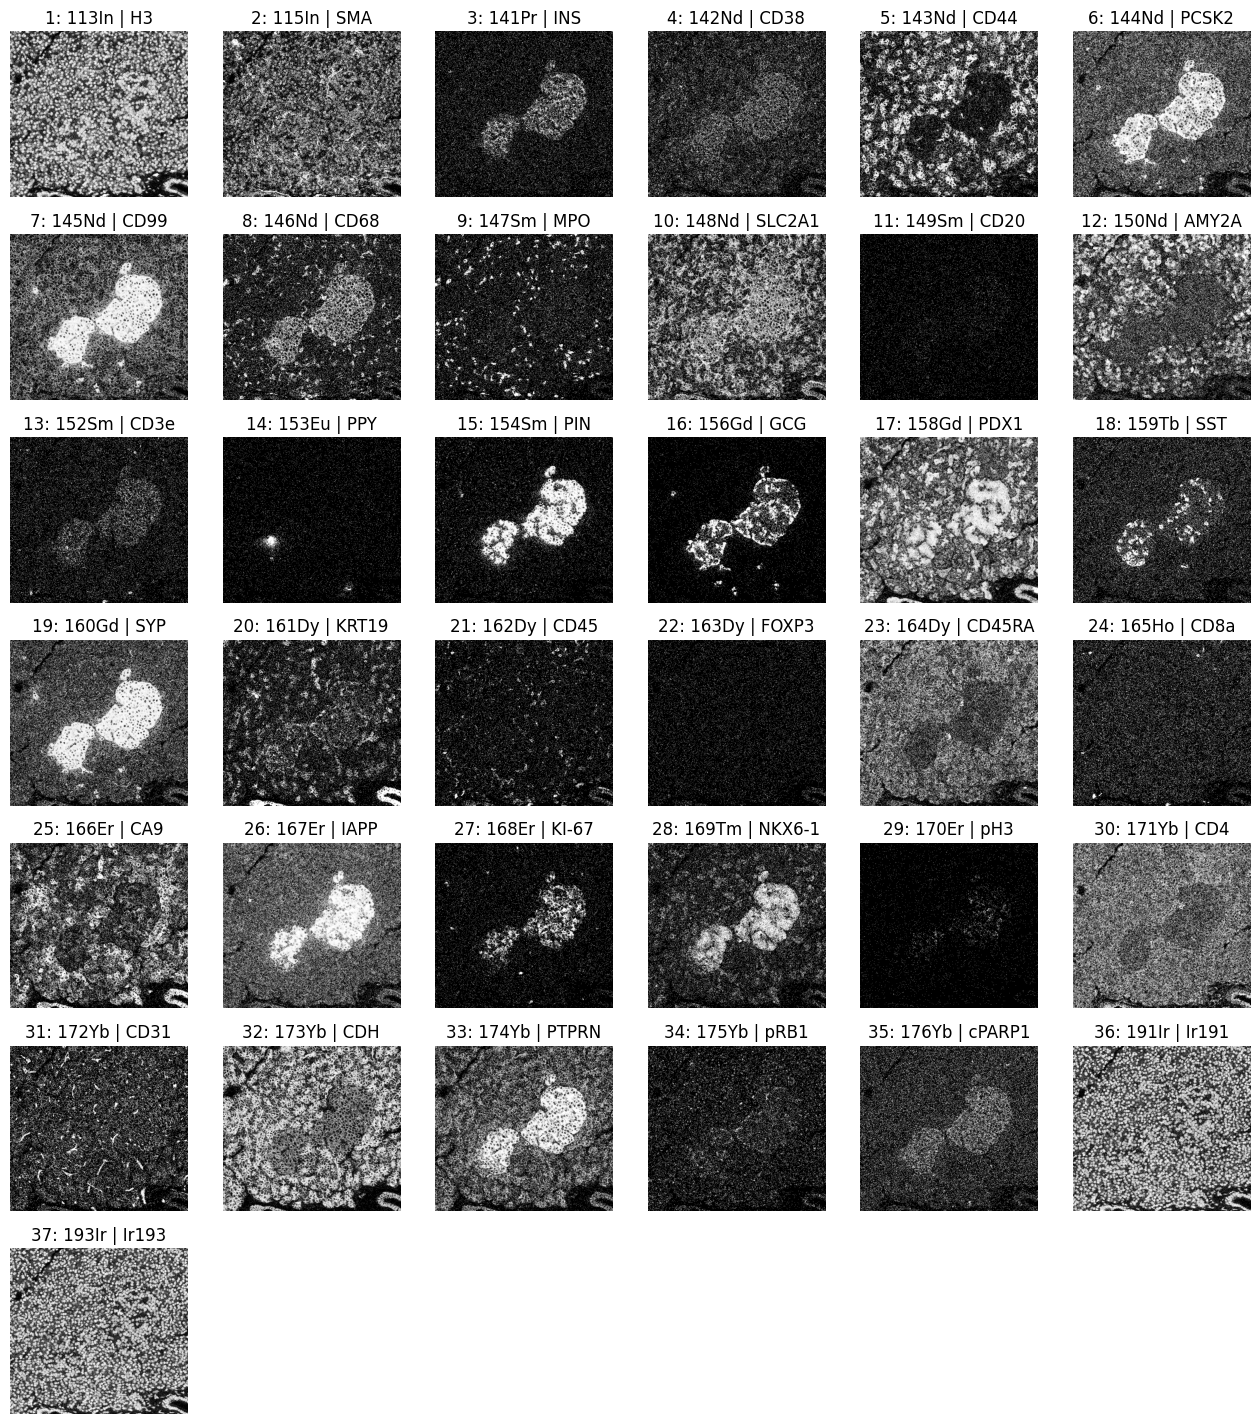

In [30]:
#fig_fn = '%s/ELMED219-2024_experiments_case6126_E08_channel_eq_mosaic_gray.pdf' % fn_fig_base
fig, axes = plt.subplots(7, 6, figsize=(16, 18), sharex=False, sharey=False)
ax = axes.ravel()
for i, item in enumerate(range(n_chn)):
    chn = np.squeeze(im[i,:,:])
    chn_eq = np.sort(chn.ravel()).searchsorted(chn)  # a kind of histogram equalization
    ax[i].imshow(chn_eq, cmap='gray' )   # cmap='jet', 'gray'
    ax[i].set_title('%d: %s | %s' % ((i+1), df_p_sort_chn['Metal Tag'].iloc[i], df_p_sort_chn['Short Name'].iloc[i]))
    ax[i].axis('off')
chn_0 = np.zeros(chn.shape )   
for j in range(n_chn,7*6):
    ax[j].imshow(chn_0, cmap='gray_r') 
    ax[j].axis('off')
#plt.savefig(fig_fn, bbox_inches='tight')
plt.show()

## Prepare the multichannel IMC image for NIFTI format

In [31]:
im.shape

(37, 530, 567)

In [32]:
def hist_eq(chn):
    return np.sort(chn.ravel()).searchsorted(chn)

In [33]:
imc_img = np.zeros(shape=(im.shape[2], im.shape[1], 1, im.shape[0]))
imc_img_eq = np.zeros(shape=(im.shape[2], im.shape[1], 1, im.shape[0]))
print(imc_img.shape)
for i in range(im.shape[0]):
    a = np.squeeze(im[i,:,:])
    b = np.squeeze(hist_eq(im[i,:,:]))
    imc_img[:,:,0,i] = a[::-1,::-1].T /a.max()
    imc_img_eq[:,:,0,i] = b[::-1,::-1].T /b.max()

(567, 530, 1, 37)


### Make a neuroimaging NIFTI-formated multichannel image 
**(for using neuroimaging display tools like Freesurfer's [FreeView](https://surfer.nmr.mgh.harvard.edu/fswiki/FreeviewGuide/FreeviewGeneralUsage/FreeviewInterface) or FSL's [FSLeyes](https://users.fmrib.ox.ac.uk/~paulmc/fsleyes/userdoc/latest)**

In [34]:
imc_nii = nib.Nifti1Image(imc_img, affine=np.eye(4))
imc_nii_eq = nib.Nifti1Image(imc_img_eq, affine=np.eye(4))  # "histogram equalized channels" image

#### Save this NIFTI image to disk

In [35]:
nib.save(imc_nii, './data/imc/imc_%d_chns.nii.gz' % (im.shape[0]))
nib.save(imc_nii_eq, './data/imc/imc_%d_chns_eq.nii.gz' % (im.shape[0]))

#### How to read IMC data in its native format [`readimc`](https://github.com/BodenmillerGroup/readimc)

In [37]:
import readimc

In [39]:
??readimc

Type:        module
String form: <module 'readimc' from '/home/arvid/anaconda3/envs/bmed365/lib/python3.11/site-packages/readimc/__init__.py'>
File:        ~/anaconda3/envs/bmed365/lib/python3.11/site-packages/readimc/__init__.py
Source:     
"""Python package for reading imaging mass cytometry (IMC) files"""

from .imc_file import IMCFile
from .mcd_file import MCDFile
from .mcd_parser import MCDParser, MCDParserError
from .txt_file import TXTFile

__all__ = [
    "IMCFile",
    "TXTFile",
    "MCDFile",
    "MCDParser",
    "MCDParserError",
]

----------------